## House Price Prediction

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.



With 79 explanatory variables describing (almost) every aspect of residential homes, build a machine learning model to predict the price of a house



Dataset Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv(r"C:\Users\Windows 11\Downloads\house-prices\train.csv")

In [177]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [179]:
df.shape

(1460, 81)

In [180]:
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [181]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [182]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

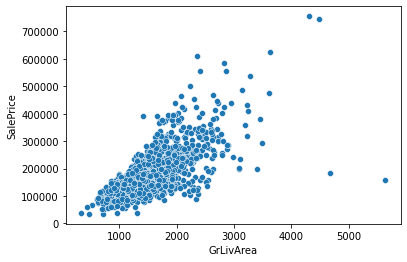

In [183]:
sns.scatterplot(x="GrLivArea",y="SalePrice",data=df)

In [184]:
df= df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)].index,axis=0)

In [185]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [186]:
df.shape

(1458, 76)

Text(0.5, 1.0, 'MSSubClass Count')

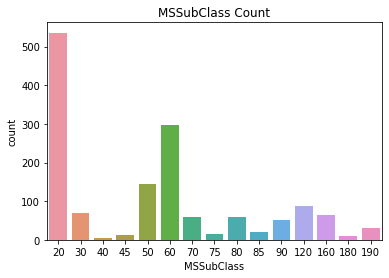

In [187]:
sns.countplot(x="MSSubClass",data=df)
plt.title('MSSubClass Count')

In [188]:
cols = df.select_dtypes(include="object").columns

In [189]:
cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [190]:
features = []

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

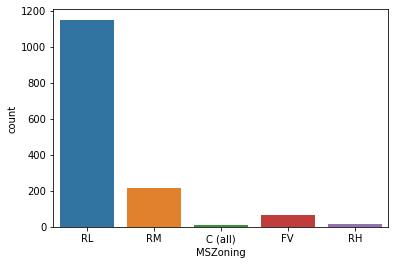

In [191]:
sns.countplot("MSZoning",data=df)

In [192]:
#Plotting
def plotting(col):
    sns.countplot(x=col,data=df)
    plt.title('CountPlot for '+ col)

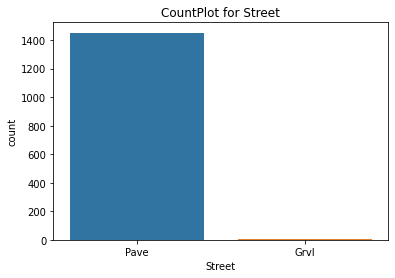

In [193]:
plotting('Street')

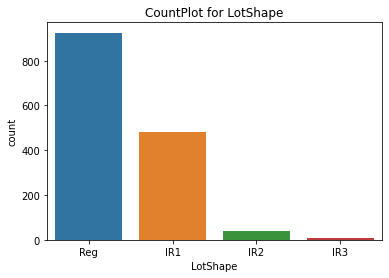

In [194]:
plotting('LotShape')
features.append('LotShape')

In [195]:
df.LotShape=df.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

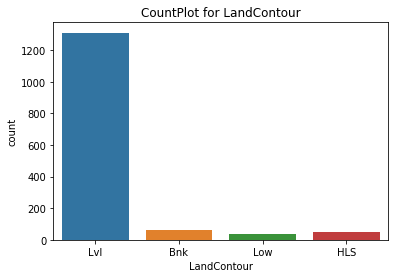

In [196]:
plotting('LandContour')
#It is biased towards only one category so it should be avoided

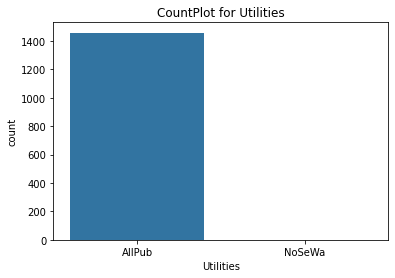

In [197]:
plotting('Utilities')

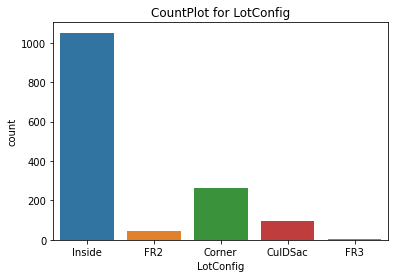

In [198]:
plotting('LotConfig')

In [199]:
features.append('LotConfig')
df.LotConfig=df.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})

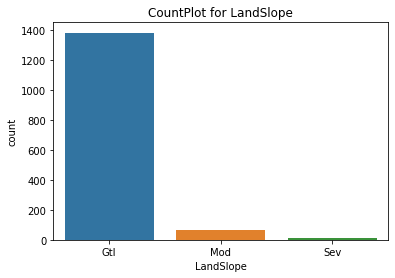

In [200]:
plotting('LandSlope')

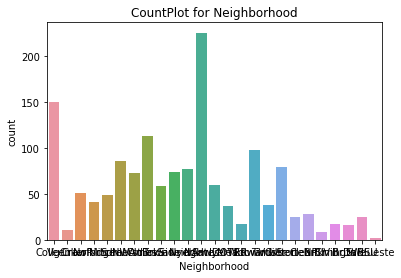

In [201]:
plotting('Neighborhood')

In [202]:
features.append('Neighborhood')
df.Neighborhood=df.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

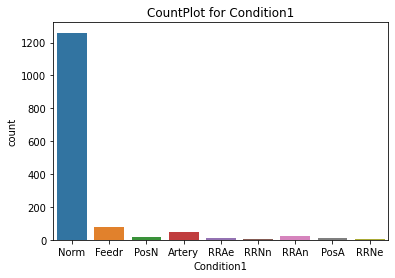

In [203]:
plotting('Condition1')

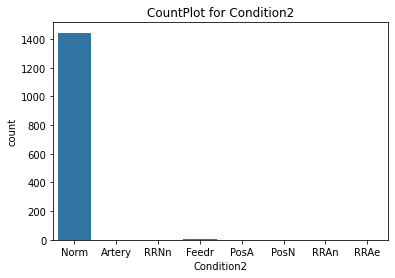

In [204]:
plotting('Condition2')

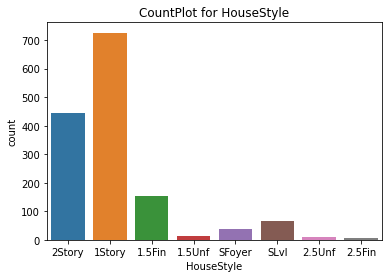

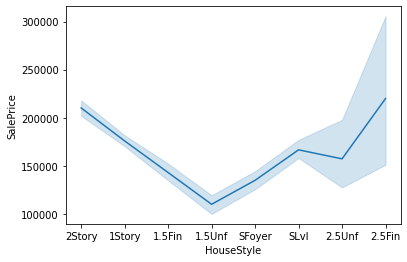

In [205]:
plotting('HouseStyle')
plt.show()
sns.lineplot(y='SalePrice',x='HouseStyle',data=df)
features.append('HouseStyle')
df.HouseStyle=df.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

In [206]:
features

['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle']

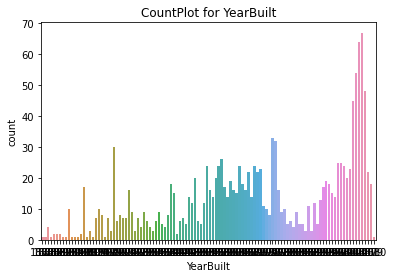

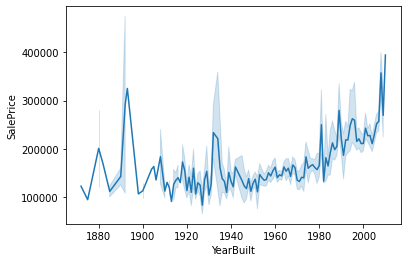

In [207]:
plotting('YearBuilt')
plt.show()
sns.lineplot(y='SalePrice',x='YearBuilt',data=df)
features.append('YearBuilt')

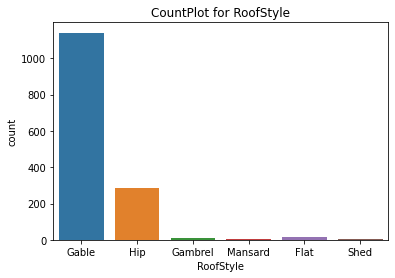

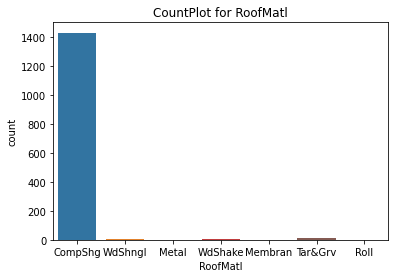

In [208]:
plotting('RoofStyle')
plt.show()
plotting('RoofMatl')

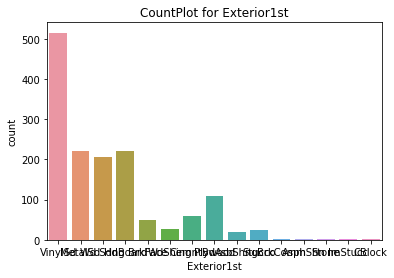

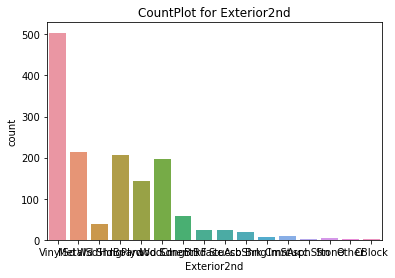

In [209]:
plotting('Exterior1st')
plt.show()
plotting('Exterior2nd')
plt.show()

df.Exterior1st=df.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
features.append('Exterior1st')

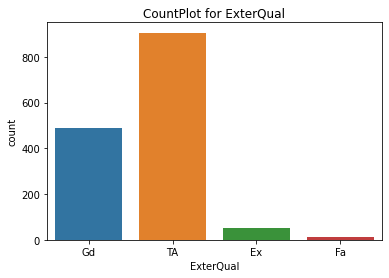

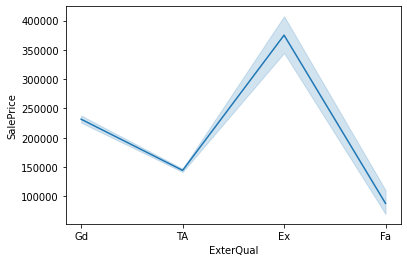

In [210]:
plotting('ExterQual')
plt.show()
sns.lineplot(y='SalePrice',x='ExterQual',data=df)
features.append('ExterQual')
df.ExterQual = df.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

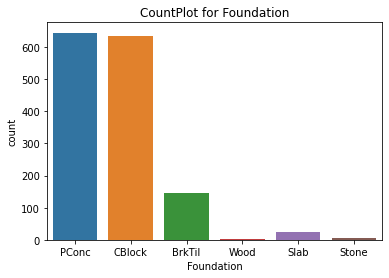

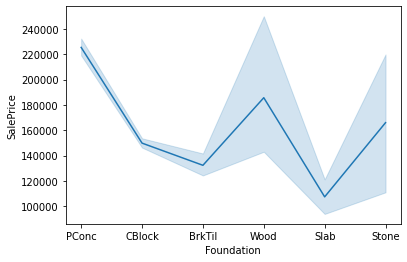

In [211]:
plotting('Foundation')
plt.show()
sns.lineplot(y='SalePrice',x='Foundation',data=df)
df.Foundation=df.Foundation.replace({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
features.append('Foundation')

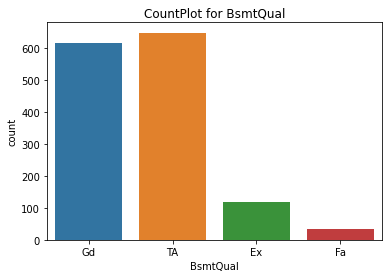

In [212]:
plotting('BsmtQual')
df.BsmtQual=df.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
features.append('BsmtQual')

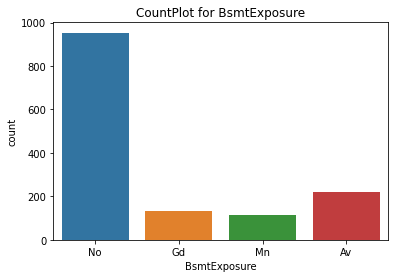

In [213]:
plotting('BsmtExposure')
df.BsmtExposure=df.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
features.append('BsmtExposure')

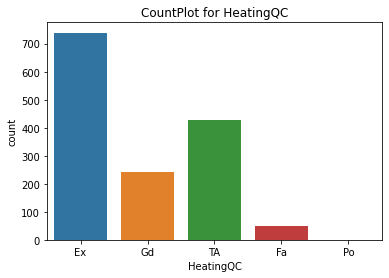

In [214]:
plotting('HeatingQC')
df.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('HeatingQC')

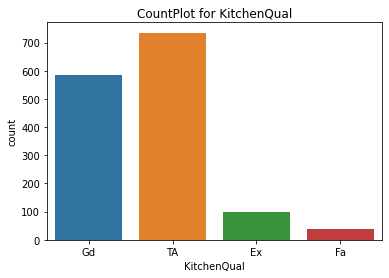

In [215]:
plotting('KitchenQual')
df.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
features.append('KitchenQual')

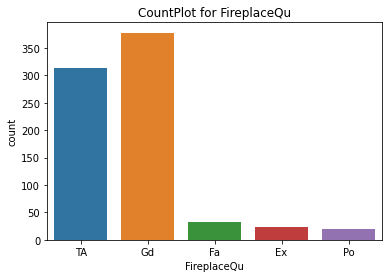

In [216]:
plotting('FireplaceQu')
df.FireplaceQu.fillna('None',inplace=True)
df.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('FireplaceQu')

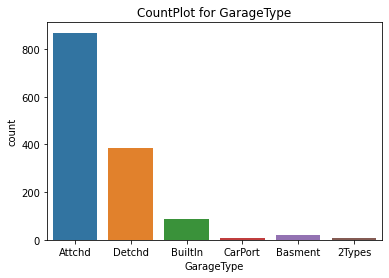

In [217]:
plotting('GarageType')
df.GarageType.fillna('None',inplace=True)
df.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
features.append('GarageType')

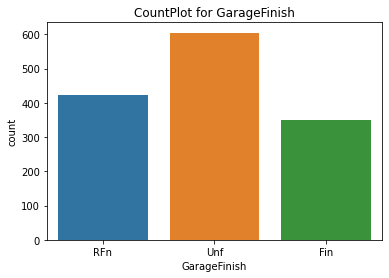

In [218]:
plotting('GarageFinish')
df.GarageFinish.fillna('None',inplace=True)
df.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
features.append('GarageFinish')


In [219]:
df = df.select_dtypes(exclude="object")

In [220]:
df.isnull().sum().sort_values(ascending=False).head()

GarageYrBlt     81
MasVnrArea       8
Id               0
GarageFinish     0
FullBath         0
dtype: int64

In [221]:
df.GarageYrBlt.fillna(value=0,inplace=True)

In [222]:
df.GarageYrBlt = df.GarageYrBlt.apply(lambda x : df.GarageYrBlt.mean() if x==0 else x)

In [223]:
df.MasVnrArea.fillna(value=0,inplace=True)

In [224]:
df.isnull().sum().sort_values(ascending=False).head()

Id              0
GarageFinish    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

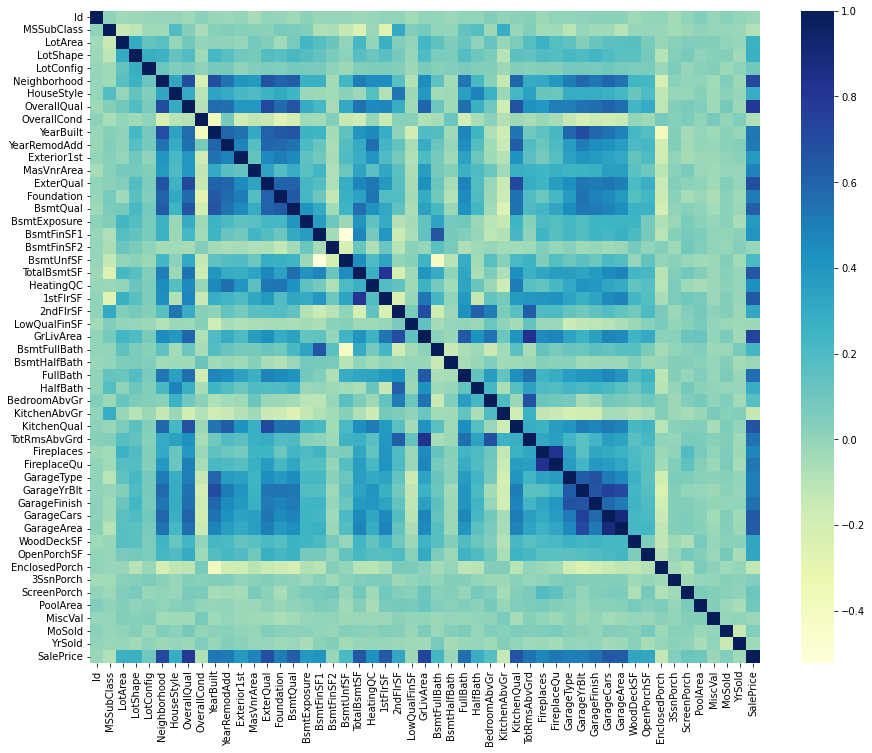

In [225]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

In [226]:
core=df.corr()
core_des=core.sort_values(by='SalePrice',ascending=False)
core_des

,Id,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021673,-0.084276,0.268179,0.270477,0.092499,0.714816,0.292263,0.795774,-0.077948,0.523608,...,0.324758,0.321142,-0.128646,0.044568,0.111415,0.099490,-0.021203,0.046124,-0.028882,1.000000
OverallQual,-0.030213,0.032522,0.091392,0.190817,0.064424,0.698303,0.295311,1.000000,-0.090442,0.571368,...,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774
GrLivArea,0.003138,0.076778,0.232927,0.192468,0.060986,0.445915,0.387912,0.589414,-0.077423,0.194397,...,0.247120,0.302569,0.012976,0.022520,0.107768,0.115999,-0.001637,0.057296,-0.035971,0.734968
Neighborhood,-0.005199,-0.033817,0.163314,0.258677,0.110011,1.000000,0.319249,0.698303,-0.227835,0.693202,...,0.241284,0.224299,-0.203173,0.020038,0.002484,0.001841,-0.045537,0.046575,-0.025165,0.714816
ExterQual,0.003413,0.015982,0.040373,0.180443,0.051259,0.672615,0.252170,0.723286,-0.137724,0.597356,...,0.205586,0.279707,-0.149025,0.037582,0.013799,0.012827,-0.039184,0.044280,-0.005866,0.686756
KitchenQual,0.013709,-0.012652,0.055988,0.151122,0.034402,0.594952,0.224432,0.670627,-0.025207,0.528822,...,0.219112,0.249783,-0.105126,0.022769,0.031731,0.046646,-0.054012,0.052985,0.002788,0.662236
TotalBsmtSF,-0.025908,-0.253194,0.223914,0.172605,0.042197,0.499270,-0.028472,0.538595,-0.174931,0.400266,...,0.234476,0.215140,-0.096773,0.040921,0.092574,0.036089,-0.018514,0.025775,-0.014880,0.651153
GarageCars,0.016863,-0.040248,0.152484,0.194461,0.097318,0.589046,0.272117,0.600741,-0.185275,0.537301,...,0.225462,0.209968,-0.151110,0.035957,0.050909,0.019446,-0.043004,0.039520,-0.038494,0.641047
1stFlrSF,0.003921,-0.262529,0.269234,0.165273,0.048999,0.430266,-0.086386,0.469092,-0.144717,0.281253,...,0.235439,0.178859,-0.064247,0.059521,0.095042,0.062756,-0.021045,0.040558,-0.012810,0.631530
GarageArea,0.014316,-0.099790,0.163680,0.161068,0.068097,0.547840,0.221161,0.557230,-0.150503,0.477998,...,0.222482,0.228246,-0.121194,0.035880,0.053015,0.026642,-0.027236,0.032470,-0.027209,0.629217


In [227]:
core_des_top=core_des[(core_des['SalePrice']>0.5) & (core_des['SalePrice'] !=1)]
core_des_top.index

Index(['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'YearBuilt',
       'YearRemodAdd', 'Foundation'],
      dtype='object')

In [228]:
core_des_low=core_des[(core_des['SalePrice']<0)]
core_des_low.index

Index(['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [229]:
for i in ['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr','OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'YearBuilt',
       'YearRemodAdd', 'Foundation']:
    features.append(i)

In [238]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr',
 'OverallQual',
 'GrLivArea',
 'Neighborhood',
 'ExterQual',
 'KitchenQual',
 'TotalBsmtSF',
 'GarageCars',
 '1stFlrSF',
 'GarageArea',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation',
 'SalePrice']

In [239]:
final_df = df[features]

In [240]:
final_df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [242]:
x = final_df.drop(["Id","SalePrice"],axis=1)
y = final_df["SalePrice"]

In [243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [244]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [245]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [248]:
y_pred = lr.predict(x_test)

In [249]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 20742.419926246755
MSE: 916748037.524811
RMSE: 30277.847306649972


In [253]:
lr.score(x_test,y_test)

0.8653318896073806